# 이진 분류 평가지표

1. 정확도 (Accuracy)
2. 오차행렬 (Confusion Matrix)
3. 정밀도 (Precision)
4. 재현율 (Recall)
5. F1 SCORE
6. ROC AUC

## 1. 정확도

- 전체 예측 중 실제 데이터가 얼마나 들어맞는지를 나타내는 지표
- (TP + TN) / (TN + FP + FN + TP)

## 2. 오차행렬

- 실제 데이터의 0과 1, 예측 데이터의 0과 1로 2X2 행렬을 만들어 오차의 종류 확인 가능

## 3. 정밀도

- Positive로 예측한 데이터 중 실제로 Positive인 비율
- TP / (FP + TP)
- Negative인것을 Positive로 예측하는 경우를 줄여야 함

## 4. 재현율

- 실제 Positive인 데이터 중 Positive라고 옳게 예측한 비율
- TP / (FN + TP)
- Positive인 것을 Negative로 예측하는 경우를 줄여야 함

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_df['Age'] = titanic_df['Age'].fillna(round(titanic_df['Age'].mean(), 2))

In [6]:
titanic_df.fillna('N', inplace=True)

In [7]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
titanic_df.Cabin = titanic_df.Cabin.str[0]

In [9]:
titanic_df.Cabin.value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [10]:
def age_band(x):
    if x < 0:
        return 'Unknown'
    elif x<=5:
        return 'Baby'
    elif x<=12:
        return 'Child'
    elif x<=18:
        return 'Teenager'
    elif x<=25:
        return 'Student'
    elif x<=35:
        return 'Young Adult'
    elif x<=60:
        return 'Adult'
    else:
        return 'Elderly'
    
titanic_df['Age_cat'] = titanic_df['Age'].map(age_band)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
def encode_features(x):
    f = ['Cabin', 'Sex', 'Embarked']
    for i in f:
        le = LabelEncoder()
        x[i] = le.fit_transform(x[i])
    
    return x

In [13]:
titanic_df = encode_features(titanic_df)

In [14]:
titanic_df = titanic_df.drop(['Name', 'Ticket', 'PassengerId', 'Age_cat'], axis=1)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
dt = DecisionTreeClassifier(random_state=11)
lr = LogisticRegression(solver='liblinear', random_state=11)
rf = RandomForestClassifier(random_state=11)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

### 정밀도: precision_score()

### 재현율: recall_score()

In [18]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print('오차행렬')
    print(confusion, '\n')
    print(f'정확도: {accuracy:.2f}\n정밀도: {precision:.2f}\n재현율: {recall:.2f}')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
y = titanic_df['Survived']
X = titanic_df.drop('Survived', axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [22]:
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [23]:
pred_dt = dt.predict(X_test)
pred_lr = lr.predict(X_test)
pred_rf = rf.predict(X_test)

In [24]:
print('DecisionTreeClassifier')
get_clf_eval(y_test, pred_dt)
print('LogisticRegression')
get_clf_eval(y_test, pred_lr)
print('RandomForestClassifier')
get_clf_eval(y_test, pred_rf)

DecisionTreeClassifier
오차행렬
[[99 19]
 [19 42]] 

정확도: 0.79
정밀도: 0.69
재현율: 0.69
LogisticRegression
오차행렬
[[108  10]
 [ 14  47]] 

정확도: 0.87
정밀도: 0.82
재현율: 0.77
RandomForestClassifier
오차행렬
[[107  11]
 [ 15  46]] 

정확도: 0.85
정밀도: 0.81
재현율: 0.75


## 예측확률: predict_proba()

In [25]:
pred_prob = lr.predict_proba(X_test)
pred_prob

array([[0.44935593, 0.55064407],
       [0.86335453, 0.13664547],
       [0.86429807, 0.13570193],
       [0.84968483, 0.15031517],
       [0.82343377, 0.17656623],
       [0.84231202, 0.15768798],
       [0.8709566 , 0.1290434 ],
       [0.27228407, 0.72771593],
       [0.78185087, 0.21814913],
       [0.33185975, 0.66814025],
       [0.86178747, 0.13821253],
       [0.87058041, 0.12941959],
       [0.86426114, 0.13573886],
       [0.87066116, 0.12933884],
       [0.56034015, 0.43965985],
       [0.85002958, 0.14997042],
       [0.8895431 , 0.1104569 ],
       [0.74250684, 0.25749316],
       [0.71120227, 0.28879773],
       [0.23776137, 0.76223863],
       [0.75684062, 0.24315938],
       [0.62428093, 0.37571907],
       [0.8465518 , 0.1534482 ],
       [0.82711127, 0.17288873],
       [0.86825802, 0.13174198],
       [0.77004142, 0.22995858],
       [0.82946324, 0.17053676],
       [0.90336287, 0.09663713],
       [0.73371998, 0.26628002],
       [0.68847387, 0.31152613],
       [0.

## 임곗값 변화에 따른 평가지표 값: precision_recall_curve()

In [26]:
from sklearn.metrics import precision_recall_curve

In [27]:
pred_prob = lr.predict_proba(X_test)[:,1]

In [28]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_prob)

In [29]:
print('반환된 분류 결정 임곗값 배열의 Shape: ', thresholds.shape)

반환된 분류 결정 임곗값 배열의 Shape:  (147,)


In [30]:
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index],2))

샘플용 10개의 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]


In [31]:
print('샘플 임곗값별 정밀도: ', np.round(precisions[thr_index],2))

샘플 임곗값별 정밀도:  [0.38 0.42 0.45 0.52 0.62 0.68 0.8  0.93 0.96 1.  ]


In [32]:
print('샘플 임곗값별 재현율: ', np.round(recalls[thr_index], 2))

샘플 임곗값별 재현율:  [1.   0.97 0.9  0.9  0.9  0.82 0.77 0.66 0.44 0.21]


In [33]:
pd.DataFrame({'precision': np.round(precisions[thr_index],2), 'recall': np.round(recalls[thr_index], 2)}, index=np.round(thresholds[thr_index],2))

,precision,recall
0.12,0.38,1.00
0.13,0.42,0.97
0.15,0.45,0.90
0.17,0.52,0.90
0.26,0.62,0.90
0.38,0.68,0.82
0.49,0.80,0.77
0.63,0.93,0.66
0.76,0.96,0.44
0.90,1.00,0.21


### threshold에 따른 precision, recall 시각화

In [34]:
import matplotlib.ticker as ticker

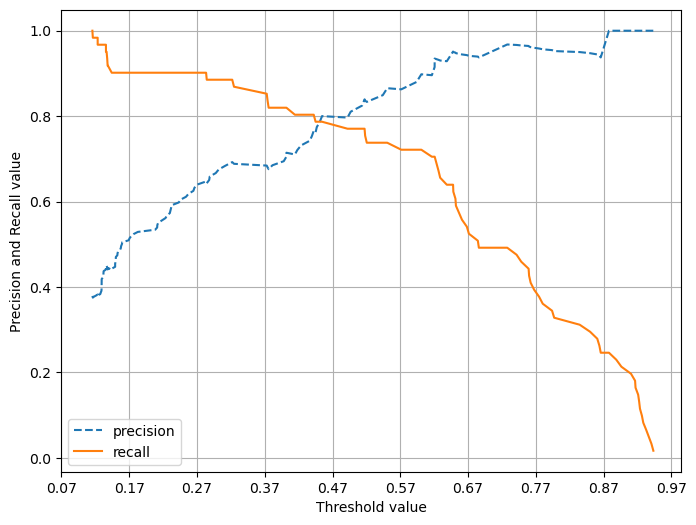

In [35]:
def precision_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, pred_prob)

## F1 스코어: 정밀도와 재현율 결합한 지표, 둘다 높을 때 높은 값을 가짐

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_test, pred_lr)

0.7966101694915254

# 피마 인디언 당뇨병 예측

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [38]:
diabetes = pd.read_csv('diabetes.csv')

In [42]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [45]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11)

In [49]:
lr = LogisticRegression(solver='liblinear')

In [50]:
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [51]:
pred = lr.predict(X_test)

In [61]:
print('confusion matrix')
print(confusion_matrix(y_test, pred))
print('accuracy')
print(accuracy_score(y_test, pred))
print('precision')
print(precision_score(y_test, pred))
print('recall')
print(recall_score(y_test, pred))
print('f1')
print(f1_score(y_test, pred))
print('auc')
print(roc_auc_score(y_test, pred))

confusion matrix
[[90 10]
 [23 31]]
accuracy
0.7857142857142857
precision
0.7560975609756098
recall
0.5740740740740741
f1
0.6526315789473683
auc
0.7370370370370369


In [65]:
pred_proba_c1 = lr.predict_proba(X_test)[:, 1]

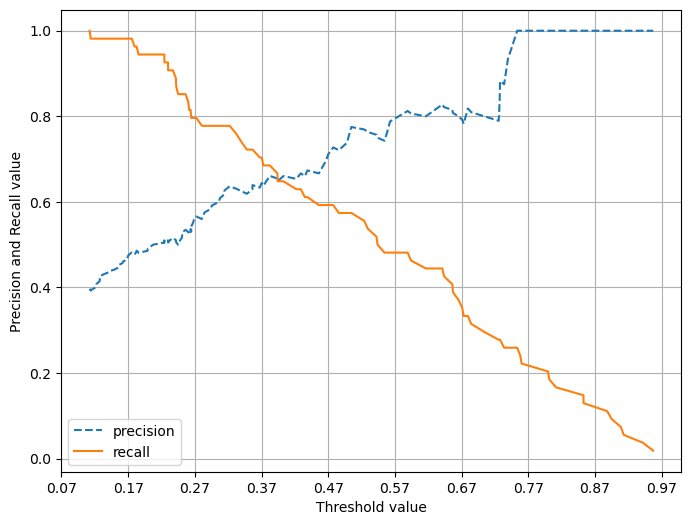

In [66]:
precision_recall_curve_plot(y_test, pred_proba_c1)

In [67]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 최솟값이 0인 컬럼 검사 필요

In [82]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes.shape[0]
for feature in zero_features:
    print(f'{feature}에서 0값을 가진 데이터 개수: {diabetes.loc[diabetes[feature]==0, feature].count()}')
    print(f'{feature}의 0값 비율: {round(100 * (diabetes.loc[diabetes[feature]==0, feature].count() / total_count), 2)}%')
    print()
    

Glucose에서 0값을 가진 데이터 개수: 5
Glucose의 0값 비율: 0.65%

BloodPressure에서 0값을 가진 데이터 개수: 35
BloodPressure의 0값 비율: 4.56%

SkinThickness에서 0값을 가진 데이터 개수: 227
SkinThickness의 0값 비율: 29.56%

Insulin에서 0값을 가진 데이터 개수: 374
Insulin의 0값 비율: 48.7%

BMI에서 0값을 가진 데이터 개수: 11
BMI의 0값 비율: 1.43%



In [87]:
mean_zero_features = diabetes[zero_features].mean()
diabetes[zero_features] = diabetes[zero_features].replace(0, mean_zero_features)

In [89]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
ss = StandardScaler()

In [93]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [95]:
X_scaled = ss.fit_transform(X)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=11)

In [119]:
lr = LogisticRegression()

In [120]:
lr.fit(X_train, y_train)

LogisticRegression()

In [121]:
pred = lr.predict(X_test)

In [122]:
print('confusion matrix')
print(confusion_matrix(y_test, pred))
print('accuracy')
print(accuracy_score(y_test, pred))
print('precision')
print(precision_score(y_test, pred))
print('recall')
print(recall_score(y_test, pred))
print('f1')
print(f1_score(y_test, pred))
print('auc')
print(roc_auc_score(y_test, pred)

confusion matrix
[[88 12]
 [25 29]]
accuracy
0.7597402597402597
precision
0.7073170731707317
recall
0.5370370370370371
f1
0.6105263157894738
auc
0.7085185185185187


In [179]:
threshold = [0.3, 0.33, 0.36, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr.predict_proba(X_test)

In [180]:
threshold_df = pd.DataFrame({'threshold': threshold})
threshold_df['accuracy_score'] = 0
threshold_df['precision'] = 0
threshold_df['recall'] = 0
threshold_df['f1'] = 0
threshold_df['auc'] = 0
threshold_df.index = threshold_df['threshold']
threshold_df.drop('threshold', axis=1, inplace=True)

for t in threshold:
    pred = (pred_proba[:,1] > t).astype(int)
    threshold_df.loc[t, 'accuracy_score'] = accuracy_score(y_test, pred)
    threshold_df.loc[t, 'precision'] = precision_score(y_test, pred)
    threshold_df.loc[t, 'recall'] = recall_score(y_test, pred)
    threshold_df.loc[t, 'f1'] = f1_score(y_test, pred)
    threshold_df.loc[t, 'auc'] = roc_auc_score(y_test, pred)

In [181]:
threshold_df

,accuracy_score,precision,recall,f1,auc
threshold,,,,,
0.30,0.753247,0.621212,0.759259,0.683333,0.754630
0.33,0.753247,0.629032,0.722222,0.672414,0.746111
0.36,0.759740,0.644068,0.703704,0.672566,0.746852
0.42,0.772727,0.686275,0.648148,0.666667,0.744074
0.45,0.785714,0.714286,0.648148,0.679612,0.754074
0.48,0.759740,0.697674,0.555556,0.618557,0.712778
0.50,0.759740,0.707317,0.537037,0.610526,0.708519
